In [2]:
import geopandas as gp
import geojson as gj
import shapefile
import pyproj
from shapely.geometry.linestring import LineString
from shapely.geometry.multilinestring import MultiLineString
from collections import namedtuple

In [5]:
input_file = "../GIS/shp/H29建物.shp"

In [7]:
df = gp.read_file(input_file)

In [8]:
poly = df.geometry[0]

# シェイプファイルから多角形の頂点を取得

最初と最後が同じ値ぽい

In [9]:
for c in poly.boundary.coords:
    print(c)

(-11067.9367665495, -35382.5209622648)
(-11038.101223755, -35388.8660777008)
(-11039.9912581402, -35395.2786943647)
(-11068.5442776019, -35384.8835052463)
(-11067.9367665495, -35382.5209622648)


穴があいた図形の場合

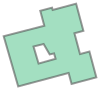

In [10]:
poly2 = df.query("UMIDNO==22196").geometry.iloc[0]
poly2

In [11]:
poly.boundary, poly2.boundary

(<shapely.geometry.linestring.LineString at 0x119baf7d0>,
 <shapely.geometry.multilinestring.MultiLineString at 0x119bee190>)

穴が空いている場合はMultiLineString

In [12]:
print(len(poly2.boundary))
print(poly2.boundary[0])

2
LINESTRING (-12208.72 -37334.52, -12218.22 -37301.62, -12191.61 -37294.76, -12194.23 -37284.95, -12186.53 -37282.9, -12186.13 -37284.4, -12170.75 -37280.29, -12165.99 -37298.09, -12171.85 -37299.65, -12168.2 -37313.32, -12162.02 -37311.67, -12157.51 -37328.56, -12173.73 -37332.89, -12175.65 -37325.69, -12208.72 -37334.52)


これで頂点は取れそう

In [13]:
poly2.boundary[0].coords[0]

(-12208.72, -37334.52)

# 直交座標系から緯度経度への変換

In [21]:
def swap(c):
    return c[1], c[0]

In [22]:
tf = pyproj.transformer.Transformer.from_proj(
    pyproj.Proj("EPSG:6677"),
    pyproj.Proj("EPSG:4326")
)
ret = tf.transform(*swap(poly2.boundary[0].coords[0]))
print(f"ret={ret}")

ret=(35.66341009364712, 139.69848434961412)


In [23]:
def shp2json(shp):
    b = shp.boundary
    if type(b) is MultiLineString:
        css = [ls.coords for ls in b]
    else:
        css = [b.coords]
    coordss = [
        [swap(tf.transform(*swap(c))) for c in cs]
        for cs in css
    ]
    return gj.Polygon(coordss)

In [25]:
tu.start()
js = shp2json(poly2)
tu.end()
print(js)

{"coordinates": [[[139.698484, 35.66341], [139.698379, 35.663707], [139.698673, 35.663769], [139.698644, 35.663857], [139.698729, 35.663876], [139.698733, 35.663862], [139.698903, 35.663899], [139.698956, 35.663739], [139.698891, 35.663725], [139.698932, 35.663602], [139.699, 35.663617], [139.69905, 35.663464], [139.698871, 35.663425], [139.698849, 35.66349], [139.698484, 35.66341]], [[139.698632, 35.663545], [139.698755, 35.663574], [139.698744, 35.663605], [139.698712, 35.663599], [139.698668, 35.663661], [139.698595, 35.663646], [139.698632, 35.663545]]], "type": "Polygon"}


elapsed: 0.0008001327514648438

In [18]:
str(js)

'{"coordinates": [[[139.698484, 35.66341], [139.698379, 35.663707], [139.698673, 35.663769], [139.698644, 35.663857], [139.698729, 35.663876], [139.698733, 35.663862], [139.698903, 35.663899], [139.698956, 35.663739], [139.698891, 35.663725], [139.698932, 35.663602], [139.699, 35.663617], [139.69905, 35.663464], [139.698871, 35.663425], [139.698849, 35.66349], [139.698484, 35.66341]], [[139.698632, 35.663545], [139.698755, 35.663574], [139.698744, 35.663605], [139.698712, 35.663599], [139.698668, 35.663661], [139.698595, 35.663646], [139.698632, 35.663545]]], "type": "Polygon"}'